# Supervised Learning


by   
[__Michael Granitzer__ (michael.granitzer@uni-passau.de)]( http://www.mendeley.com/profiles/michael-granitzer/)  
[Konstantin Ziegler (konstantin.ziegler@uni-passau.de)](http://zieglerk.net)  
Jörg Schlötterer (joerg.schloetterer@uni-passau.de)

with examples taken from the [scikit-learn documentation](http://scikit-learn.org/stable/)

__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/) (CC BY 3.0)

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

## The Iris Dataset
For introducing the different supervised learners we will use the IRIS data set.

The iris data set characterises iris-flowers into three sub-groups according to length and width of the outer (petal) and inner (sepal) leaves of a flower.

**Sepal vs. Petal**


<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/220px-Petal-sepal.jpg"/>

**The three classes (setosa, versicolor, virginica)**

<div class ="img-responsive" style="display:inline" >
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="30%"/>
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg" width="30%"/>
<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg" width="30%"  height="10%" style="overflow:hidden"/>
</div>


Images from Wikipedia



In [2]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
print ("Classes:", np.unique(iris.target))
print (iris["DESCR"])

Classes: [0 1 2]
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribut

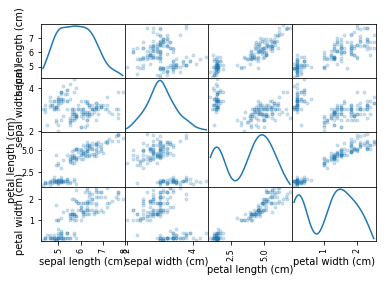

In [3]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(iris.data, columns=iris.feature_names)
pltfig = scatter_matrix(df, alpha=0.2,  diagonal='kde')

## K-Nearest Neighbour Classfication (KNN)
Is one of the simplest classifiers working on nominal targets $y$. 

1. **The fitting step** consists of storing every data point `X` and its associated target value `y`. It potentially involves creating index structures for fast lookup.
2. **The predicting step** consists of finding the $k$ closest data points in $X$ and selecting the most common target $y$ in those data points.  

The following figure shows the decision boundary of the IRIS data on the first two dimensions (original source is available under http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html)

Automatically created module for IPython interactive environment


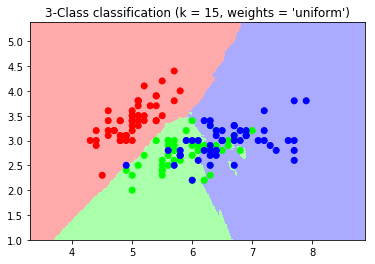

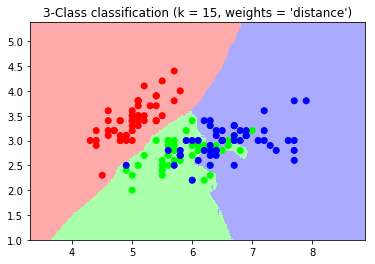

In [30]:
#%run scripts/plot_classification.py

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [5]:
# random split into train & test data
np.random.seed(0)
indices = np.random.permutation(len(iris.data))
iris_X_train = iris.data[indices[:-10]]
iris_y_train = iris.target[indices[:-10]]
iris_X_test  = iris.data[indices[-10:]]
iris_y_test  = iris.target[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)  
print ("Predicted flower classes:\t", knn.predict(iris_X_test))
print ("True flower classes     :\t", iris_y_test)
print ("correct classifciation? :\t", \
        knn.predict(iris_X_test) == iris_y_test)
print ("classifc. error (in %)  :\t", \
        np.sum(knn.predict(iris_X_test) == iris_y_test)\
        *100.0/len(iris_y_test))

Predicted flower classes:	 [1 2 1 0 0 0 2 1 2 0]
True flower classes     :	 [1 1 1 0 0 0 2 1 2 0]
correct classifciation? :	 [ True False  True  True  True  True  True  True  True  True]
classifc. error (in %)  :	 90.0


## Logistic Regression
Logistic Regressions applies a non-linear transformation to the linear regression output in order to bring the output in the range $[0:1]$. 

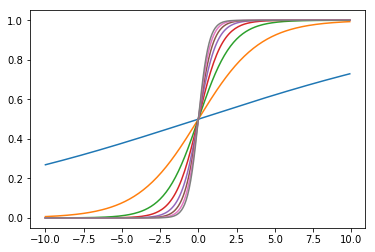

In [6]:
def sigmoid(x,beta,offset = 0.0):
    return 1/(1+np.exp(-beta*x + offset))

x = np.arange(-10, 10,0.1)
for beta in np.arange(0.1,3.0,0.4):
    plt.plot(x, sigmoid (x, beta))

In [7]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

print ("Predicted flower classes:\t", logistic.predict(iris_X_test))
print ("True flower classes     :\t", iris_y_test)
print ("correct classifciation? :\t", logistic.predict(iris_X_test) 
                                     == iris_y_test)
print ("classifc. error (in %)  :\t", \
      np.sum(logistic.predict(iris_X_test) == iris_y_test)*100.0\
      /len(iris_y_test))

Predicted flower classes:	 [1 2 1 0 0 0 2 1 2 0]
True flower classes     :	 [1 1 1 0 0 0 2 1 2 0]
correct classifciation? :	 [ True False  True  True  True  True  True  True  True  True]
classifc. error (in %)  :	 90.0


## Multiclass, Multilabel Classification

- **Multiclass-Classifier:** A classifier is capable to select from more than one class, i.e. a flower can be assigned to seritosa, vertigo and virsicolor
- **Multilabel-Classifier:** An example is assigned to one or more classes

Our original regression problem only predicted one variable ($y$), which translates into a binary classification model, i.e. an example is assigned to a class or not.

If possible, Scikit learn automatically extends the estimators to multiclass-labels, according to the following strategies. 

Multiclass problems can be decomposed into binary classification problems:

- "One vs. All" approach: One classifier per class trained against all other classes
- "One vs. One" approach: There are $k$ classifiers for a class (assuming we have $k$ classes). An example is assigned to the class that has won most often. 

See the [sklearn documentation](http://scikit-learn.org/stable/modules/multiclass.html) for details.

### One vs. All Decision Surfaces for the Logistic Regression on the IRIS Data

Automatically created module for IPython interactive environment


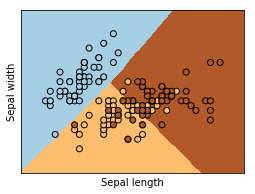

In [33]:
#%run scripts/plot_iris_logistic.py

print(__doc__)


# Code source: Gael Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


## Support Vector Machines
Support Vector Machines are linear classifiers that find very robust classifiers. In particular, they maximize the margin between the decision boundary and the positive/negative examples.

This decision boundary is described by a weighted combination of a set of border examples, the so called Support Vectors.

SVMs can be extended to non-linear classifiers using so called Kernel Methods (out of scope here)

<p>

<div class="alert alert-info">
Support Vector Machines are usually a very good choice for classification tasks due to their robustnes against irrelevant features and noisy examples, especially in high-dimensional input spaces.
</div>

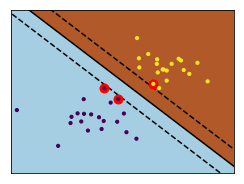

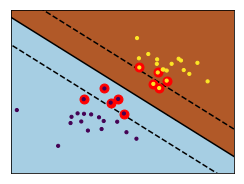

In [34]:
#%run scripts/plot_svm_margin.py 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='red', zorder=9)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, s=10)

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

In [10]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)  

print ("Predicted flower classes:\t", svc.predict(iris_X_test))
print ("True flower classes     :\t", iris_y_test)
print ("correct classifciation? :\t", svc.predict(iris_X_test) == iris_y_test)
print ("classifc. error (in %)  :\t", \
      np.sum(svc.predict(iris_X_test) == iris_y_test)*100.0\
      /len(iris_y_test))

Predicted flower classes:	 [1 2 1 0 0 0 2 1 2 0]
True flower classes     :	 [1 1 1 0 0 0 2 1 2 0]
correct classifciation? :	 [ True False  True  True  True  True  True  True  True  True]
classifc. error (in %)  :	 90.0


## Model Selection and Performance Evaluation
**What is a good estimator?** 
<div class= "alert alert-warning">
Model Selection refers to the process of tuning parameters and hyper-parameters in order to find a good machine learning estimator. 
</div>

It requires the 

- Selection of an error measure
- Definition of a test procedure that measures the generalisation performance over unseen examples

### Error Measures
#### Accuracy
The most basic measure for a binary classification task is the accuracy, i.e.

$$
 accuracy =\frac{\sum_{x_i}y_i == h(x_i)}{|X|}
$$

where $h(x_i)$ is the estimator for example $x_i$ and $y_i$ is the true label of $x_i$

`sklearn` provides a `score` method that calculates this error measure

In [11]:
svc.score(iris_X_test,iris_y_test)

0.90000000000000002

The accuracy is often not an ideal measure, due to several reasons

- For unbalanced data sets, i.e. more negative (positive) examples than positive (negative) examples, it does not represent the real performance of an estimator.
- For multilabel data, it is unclear how to evaluate the equality of the estimator and the true label
- It does not provide any insights on whether the estimator makes errors du to accepting too many examples to a concept, or rejecting too many of them.

### Precision and Recall
Precision and Recall are two measures coming from Information Retrieval, which give insights on the quality of error. They are build on the concept of a contingence table. 

**Precision** defines the **accuracy** of an estimator **wrt. a certain classification decision**

**Recall** defines the **completeness** of an estimator **wrt. a certain classification decision**

To illustrate that we introduce the concept of a contingence table. 

#### Contigence Table
**Formal definitions**

- estimator $h(x)$
- examples $X={<x_1,Y_1>,\ldots,<x_n,Y_n>}$, with $Y_n \subset Y$ and $Y$ being the **set of possible classes** an example 

For every class $a\in Y$ we define the contingency table as:

|Contingency Table for Class $a$| $y_i == a$ | $y_i \neq a$|
|---|---|---|
|$h(x_i)==a$|True Positive (TP)|False Positive (FP)|
|$h(x_i)\neq a$|False Negative (FN)|True Negative (TN)|

- `{False|True}` reflects whether the outcome was correct or not
- `{Positive|Negative}` reflects whether the decision was to assign it to $a$ (positive) or not (negative)




**Precision** now estimates the probability that an assignment made by $h$ is correct:

$$
Precision_a = \frac{TP_a}{TP_a+FP_a}
$$

**Recall** now estimates the probability that $h$ has found all correct assignments

$$
Recall_a = \frac{TP_a}{TP_a+FN_a}
$$

**F1** defines a combined measure, which is the harmonic mean between Precision and Recall:

$$
F1_a = \frac{2*Precision_a*Recall_a}{Precision_a + Recall_a}
$$

#### Microaveraging vs. Macroaveraging

Precision and Recall define the quality estimators with respect to a specific class $a$.

Given multiple classes $a\in Y$, there are two ways for generating a single estimator:

- **Microaveraging** sums over all single decisions, i.e. 
$$
Precision^\mu = \frac{\sum_{a\in Y}TP_a}{\sum_{a\in Y}TP_a+\sum_{a\in Y}FP_a}
$$
- **Macroaveraging** sums over all class estimators, i.e.

$$
Precision^\nu = \frac{1}{|Y|}\sum_{a\in Y}Precision_a
$$


<div class="alert alert-info">
Note that in the case of microaveraging in a single label classification:
$Precision^\mu==Recall^\mu== Accuracy$.

The reason is, that every FN becomes a FP in another class and hence the sum of FN and FP is the same.
</div>

Further details can be found under [1] and [2]

[1] http://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

[2] http://scikit-learn.org/stable/auto_examples/plot_precision_recall.html

### Test Procedure and Parameter Estimation
In the examples above we have always used a fraction of the example for the training and the remaining examples for testing.

- Why?
- What is the impact of a random split?
- Can we do better?

Note that we want to generalize over our given data. So we need to split the data into a training and a test set to get an unbiased estimator of the model quality on **unseen examples**. 

A **random split** can be very bad or very good. So we would need more random splits to avoid such a bias.

A better, more efficient method is called **cross-validation**.



### k-folded Cross Validation
Given our examples $X$, we split them into $k-folds$ of approximate equal size. 

1. for every fold $i$ in $k we

    1. Fit our model on all but the examples in the $k^{th}$ fold
    2. Estimate the quality of our model on the examples from the  $k^{th}$ fold
    
2. Average the obtained quality indicators (e.g. precision/recall) over al the $k-folds$


<p>


<div class="alert alert-info">
When averaging over quality indicators like accuracy, always investigate the standard deviation in addition to the average value. The standard deviation tells you how robust your estimated quality indicator is wrt. different runs.
</div>




In [12]:
#sklearn provides cv functionality as generator function
from sklearn import cross_validation
k_fold = cross_validation.KFold(n=6, n_folds=3)
for train_indices, test_indices in k_fold:
     print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


/root/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
k_fold = cross_validation.KFold(n=iris.data.shape[0], n_folds=8)

scores = []
for train_indices, test_indices in k_fold:
     logistic = linear_model.LogisticRegression(C=1e5)
     logistic.fit(iris.data[train_indices], iris.target[train_indices])  
     scores.append(
                  logistic.score(iris.data[test_indices], 
                                 iris.target[test_indices])
                  )
     print ('Score: %f' % (scores[-1]))

print ("Average model accuracy %f +/- %f" % (np.mean(scores),np.std(scores)))

Score: 1.000000
Score: 1.000000
Score: 1.000000
Score: 0.947368
Score: 0.947368
Score: 0.947368
Score: 0.944444
Score: 0.888889
Average model accuracy 0.959430 +/- 0.036357


<div class="alert alert-success">
Questions:
</div>

- Run the above code with $n=3$. What is wrong and why?
- What is the highest possible $k$?

## Text Classification

### Naive Bayes
#### Data Set
The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. The data is organized into 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware / comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale / soc.religion.christian). Here is a list of the 20 newsgroups, partitioned (more or less) according to subject matter:




<table border=1>
<tr>
<td>comp.graphics<br>comp.os.ms-windows.misc<br>comp.sys.ibm.pc.hardware<br>comp.sys.mac.hardware<br>comp.windows.x</td>
<td>rec.autos<br>rec.motorcycles<br>rec.sport.baseball<br>rec.sport.hockey</td>
<td>sci.crypt<br>sci.electronics<br>sci.med<br>sci.space</td>
</tr><tr>
<td>misc.forsale</td>
<td>talk.politics.misc<br>talk.politics.guns<br>talk.politics.mideast</td>
<td>talk.religion.misc<br>alt.atheism<br>soc.religion.christian</td>
</tr>
</table>

The "bydate"-option is sorted by date into training(60%) and test(40%) sets, does not include cross-posts (duplicates) and does not include newsgroup-identifying headers (Xref, Newsgroups, Path, Followup-To, Date). 

<div class="alert alert-success">
Implement your own naive bayes classifier and apply it to the 20newsgroups dataset.  
</div>
* Download the dataset from http://qwone.com/~jason/20Newsgroups/  Take the "byDate"-option.
* Read the files and tokenize the text to obtain a "bag of words"
* Implement the naive bayes classifier (pseudocode is given below)
* Evaluate your classfier on the training/test set. Which accuracy can you achieve?

### Naive Bayes Pseudocode
#### TrainMultiNomialNB($\mathbb C$,$\mathbb D$)  
$V \leftarrow extractVocabulary(\mathbb D)$  
$N \leftarrow countDocs(\mathbb D)$    
for $c \in \mathbb C$:  
&nbsp;&nbsp;&nbsp;&nbsp;$N_c \leftarrow countDocsInClass(\mathbb D, c)$  
&nbsp;&nbsp;&nbsp;&nbsp;$prior[c] \leftarrow \frac{N_c}{N}$  
&nbsp;&nbsp;&nbsp;&nbsp;$text_c \leftarrow concatenateTextOfAllDocsInClass(\mathbb D, c)$   
&nbsp;&nbsp;&nbsp;&nbsp;for $t \in V$:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$T_{ct} \leftarrow countTokensOfTerm(text_c,t)$  
&nbsp;&nbsp;&nbsp;&nbsp;for $t \in V$:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$condprob[t][c] \leftarrow \frac{T_{ct} + 1}{\sum_{t'}(T_{ct'} + 1)}$  
return $V,prior,condprob$

#### ApplyMultinomialNB($\mathbb C,V,prior,condprob,d$)
$W \leftarrow extractTokensFromDoc(V,d)$   
for $c \in \mathbb C$:  
&nbsp;&nbsp;&nbsp;&nbsp;$score[c] \leftarrow log(prior[c])$  
&nbsp;&nbsp;&nbsp;&nbsp;for $t \in W$:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$score[c] += log(condprob[t][c])$  
return $argmax_{c \in \mathbb C} score[c]$

** Some snippets that might be useful for the implementation: **

In [14]:
# tokenization
import re
def tokenize(doc):
    return re.findall(r'\b\w\w+\b',doc) # return all words with #characters > 1

tokenize("This is a test string.")

['This', 'is', 'test', 'string']

In [16]:
# list files (or directories)
import os
for dir in os.listdir('./20news-bydate-train/'):
    print(dir)

rec.sport.hockey
misc.forsale
sci.electronics
comp.windows.x
talk.politics.mideast
rec.autos
sci.space
sci.crypt
soc.religion.christian
talk.politics.misc
rec.motorcycles
talk.politics.guns
comp.sys.mac.hardware
comp.sys.ibm.pc.hardware
alt.atheism
comp.graphics
comp.os.ms-windows.misc
sci.med
rec.sport.baseball
talk.religion.misc


In [17]:
import codecs
# simple file reading
with open('./6-Bayes-Learning.ipynb') as f:
    doc = f.read()
    print(doc[130:159])
    
# codecs can help if you run into encoding problems
with codecs.open('./6-Bayes-Learning.ipynb', encoding='latin1') as f:
    doc = f.read()
    print(doc[130:159])

  "# Supervised Learning\n",

  "# Supervised Learning\n",



In [18]:
import pprint
with codecs.open('./20news-bydate-train/alt.atheism/49960', encoding='latin1') as file:
    pprint.pprint(file.readlines())

['From: mathew <mathew@mantis.co.uk>\n',
 'Subject: Alt.Atheism FAQ: Atheist Resources\n',
 'Summary: Books, addresses, music -- anything related to atheism\n',
 'Keywords: FAQ, atheism, books, music, fiction, addresses, contacts\n',
 'Expires: Thu, 29 Apr 1993 11:57:19 GMT\n',
 'Distribution: world\n',
 'Organization: Mantis Consultants, Cambridge. UK.\n',
 'Supersedes: <19930301143317@mantis.co.uk>\n',
 'Lines: 290\n',
 '\n',
 'Archive-name: atheism/resources\n',
 'Alt-atheism-archive-name: resources\n',
 'Last-modified: 11 December 1992\n',
 'Version: 1.0\n',
 '\n',
 '                              Atheist Resources\n',
 '\n',
 '                      Addresses of Atheist Organizations\n',
 '\n',
 '                                     USA\n',
 '\n',
 'FREEDOM FROM RELIGION FOUNDATION\n',
 '\n',
 'Darwin fish bumper stickers and assorted other atheist paraphernalia are\n',
 'available from the Freedom From Religion Foundation in the US.\n',
 '\n',
 'Write to:  FFRF, P.O. Box 750, Madis

### Implementation

In [19]:
def tokenize(doc_file):
    with codecs.open(doc_file, encoding='latin1') as doc:
        doc = doc.read().lower()
        _header, _blankline, body = doc.partition('\n\n')
        return re.findall(r'\b\w\w+\b',body)

In [20]:
pprint.pprint(tokenize('./20news-bydate-train/alt.atheism/49960'))

['archive',
 'name',
 'atheism',
 'resources',
 'alt',
 'atheism',
 'archive',
 'name',
 'resources',
 'last',
 'modified',
 '11',
 'december',
 '1992',
 'version',
 'atheist',
 'resources',
 'addresses',
 'of',
 'atheist',
 'organizations',
 'usa',
 'freedom',
 'from',
 'religion',
 'foundation',
 'darwin',
 'fish',
 'bumper',
 'stickers',
 'and',
 'assorted',
 'other',
 'atheist',
 'paraphernalia',
 'are',
 'available',
 'from',
 'the',
 'freedom',
 'from',
 'religion',
 'foundation',
 'in',
 'the',
 'us',
 'write',
 'to',
 'ffrf',
 'box',
 '750',
 'madison',
 'wi',
 '53701',
 'telephone',
 '608',
 '256',
 '8900',
 'evolution',
 'designs',
 'evolution',
 'designs',
 'sell',
 'the',
 'darwin',
 'fish',
 'it',
 'fish',
 'symbol',
 'like',
 'the',
 'ones',
 'christians',
 'stick',
 'on',
 'their',
 'cars',
 'but',
 'with',
 'feet',
 'and',
 'the',
 'word',
 'darwin',
 'written',
 'inside',
 'the',
 'deluxe',
 'moulded',
 '3d',
 'plastic',
 'fish',
 'is',
 '95',
 'postpaid',
 'in',
 'the

In [21]:
import os
import re
import math
import codecs
from sklearn import metrics


class NaiveBayesClassifier:
    def __init__(self, min_count=1):
        self.min_count = min_count
        self.vocabulary = {}
        self.num_docs = 0
        self.classes = {}
        self.priors = {}
        self.conditionals = {}

    def train(self, path):
        self.num_docs = 0
        for d in os.listdir(path):
            self.classes[d] = {'doc_counts':0, 'terms':{}}
            print(d)
            for f in os.listdir(path + d):
                terms = tokenize(path + d + '/' + f)
                self.num_docs += 1
                self.classes[d]['doc_counts'] += 1
                
                # build vocabulary and count terms
                for term in terms:
                    if not term in self.vocabulary:
                        self.vocabulary[term] = 1
                        self.classes[d]['terms'][term] = 1
                    else:
                        self.vocabulary[term] += 1
                        if not term in self.classes[d]['terms']:
                            self.classes[d]['terms'][term] = 1
                        else:
                            self.classes[d]['terms'][term] += 1
                            
        # remove terms with frequency < min_count
        self.vocabulary = {k:v for k,v in self.vocabulary.items() if v > self.min_count}

        for c in self.classes:
            # calculate priors
            self.priors[c] = math.log(self.classes[c]['doc_counts']) - math.log(self.num_docs)
            
            # calculate conditionals
            self.conditionals[c] = {}
            c_len = sum([self.classes[c]['terms'][x] for x in self.classes[c]['terms']])
            for term in self.vocabulary:
                t_ct = 1
                if term in self.classes[c]['terms']:
                    t_ct += self.classes[c]['terms'][term]
                self.conditionals[c][term] = math.log(t_ct) - math.log(c_len + len(self.vocabulary))

    def classify(self, doc):
        scores = {}
        for c in self.classes:
            scores[c] = self.priors[c]
            for term in doc:
                if term in self.vocabulary:
                    scores[c] += self.conditionals[c][term]

        return scores, max(scores, key=scores.get)

In [22]:
clf = NaiveBayesClassifier()

clf.train('./20news-bydate-train/')


test_path = './20news-bydate-test/'

out_y = []
true_y = []
for cl in clf.classes:
    for f in os.listdir(test_path + cl):
        _, result_class = clf.classify(tokenize(test_path+cl+'/'+f))
        out_y.append(result_class)
        true_y.append(cl)

print('accuracy',metrics.accuracy_score(true_y,out_y))

rec.sport.hockey
misc.forsale
sci.electronics
comp.windows.x
talk.politics.mideast
rec.autos
sci.space
sci.crypt
soc.religion.christian
talk.politics.misc
rec.motorcycles
talk.politics.guns
comp.sys.mac.hardware
comp.sys.ibm.pc.hardware
alt.atheism
comp.graphics
comp.os.ms-windows.misc
sci.med
rec.sport.baseball
talk.religion.misc


FileNotFoundError: [Errno 2] No such file or directory: './20news-bydate-test/talk.politics.misc'

#### compare with sklearn

In [27]:
from sklearn.datasets import load_files
from sklearn import feature_extraction
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB


twenty_train = load_files('./20news-bydate-train/', encoding='latin1')
twenty_test = load_files('./20news-bydate-test/', encoding='latin1')

vectorizer = feature_extraction.text.CountVectorizer()
train_X = vectorizer.fit_transform(twenty_train.data)
print(train_X.shape)

clf = MultinomialNB()
clf.fit(train_X,twenty_train.target)

pred = clf.predict(vectorizer.transform(twenty_test.data))

print('accuracy',metrics.accuracy_score(twenty_test.target,pred))

(11314, 130107)
accuracy 0.772835900159


### Naive Bayes with scikit learn
Fetch the 20 Newsgroups data set and load it via the  `sklearn.datasets.fetch_20newsgroups` function. The data set contains 20 newsgroups with 1000 posts in each newsgroup. The data set comes with a test/training split. 

<div class="alert alert-success">
Conduct the following tasks:
</div>
1. Preprocess the data set using scikit learn vectorizer
2. Train the data set using two classifiers of your choice
3. Tune the parameters of those classifiers to obtain the best results
4. Evaluate the performance on the test set and compare both classifiers.

#### Solution

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV


clf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB()),
               ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1.0, 0.1),
             }

gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
gs_clf.fit(twenty_train.data, twenty_train.target)
pred = gs_clf.predict(twenty_test.data)
print('accuracy',metrics.accuracy_score(twenty_test.target,pred))

for param_name in sorted(parameters.keys()):
    print(param_name, gs_clf.best_params_[param_name])

accuracy 0.817843866171
clf__alpha 0.1
tfidf__use_idf True
vect__ngram_range (1, 2)


In [29]:
from sklearn.linear_model import SGDClassifier


clf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42)),
               ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
             }

gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
gs_clf.fit(twenty_train.data, twenty_train.target)
pred = gs_clf.predict(twenty_test.data)
print('accuracy',metrics.accuracy_score(twenty_test.target,pred))

for param_name in sorted(parameters.keys()):
    print(param_name, gs_clf.best_params_[param_name])

accuracy 0.834838024429
clf__alpha 0.001
tfidf__use_idf True
vect__ngram_range (1, 2)


further details can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html